In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ps = PorterStemmer()
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])  # Remove special characters
    review = review.lower().split()                      # Lowercase and split
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    corpus.append(" ".join(review))

In [4]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(corpus).toarray()
y = df['label'].map({'ham': 0, 'spam': 1}).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9811659192825112

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



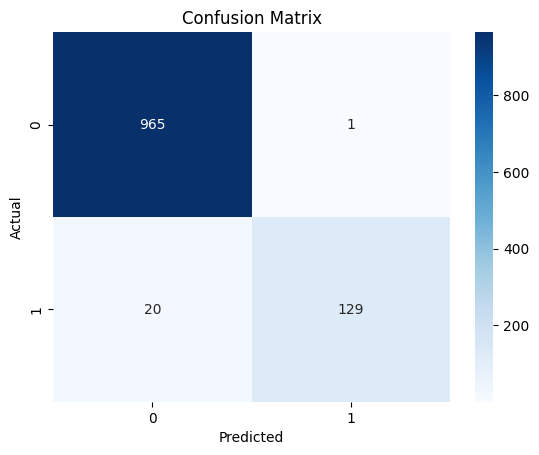

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9811659192825112


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



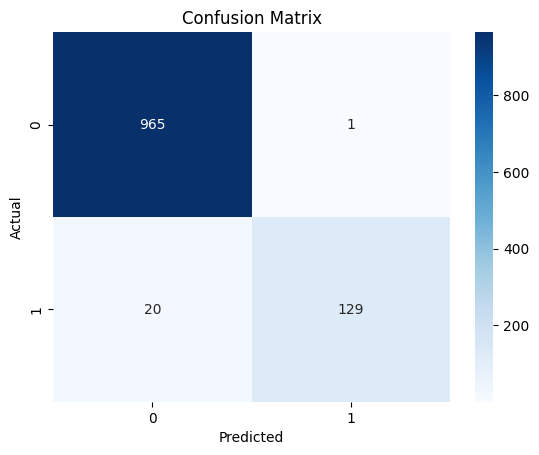

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
test_msg = ["Congratulation You've won a free iPhone. Click here to Claim."]
test_msg_processed = tfidf.transform([" ".join([ps.stem(w) for w in re.sub('[^a-zA-Z]', ' ', test_msg[0]).lower().split() if w not in stopwords.words('english')])])

prediction = model.predict(test_msg_processed)
print("Spam" if prediction[0] == 1 else "Ham")

Spam


In [25]:
test_msg = ["Wow You've won a free iPhone. Click here to get."]
test_msg_processed = tfidf.transform([" ".join([ps.stem(w) for w in re.sub('[^a-zA-Z]', ' ', test_msg[0]).lower().split() if w not in stopwords.words('english')])])

prediction = model.predict(test_msg_processed)
print("Spam" if prediction[0] == 1 else "Ham")

Ham
